In [1]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths


In [2]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Maximum Ablation 

Grounding Line Plot - Amin = -17


In [8]:
gl_run_title_amin17 = str("Grounding Line Evolution Over Time - Max Ablation = -17 m/yr")
amin17 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/Amin_Amax_Tests/AMAX_8/Run8_min17/DATA_Dictionary_2025_04_15__23_06_45.pkl.gz"
with gzip.open(amin17, 'rb') as f:
    DATA_dict_amin17 = pickle.load(f)

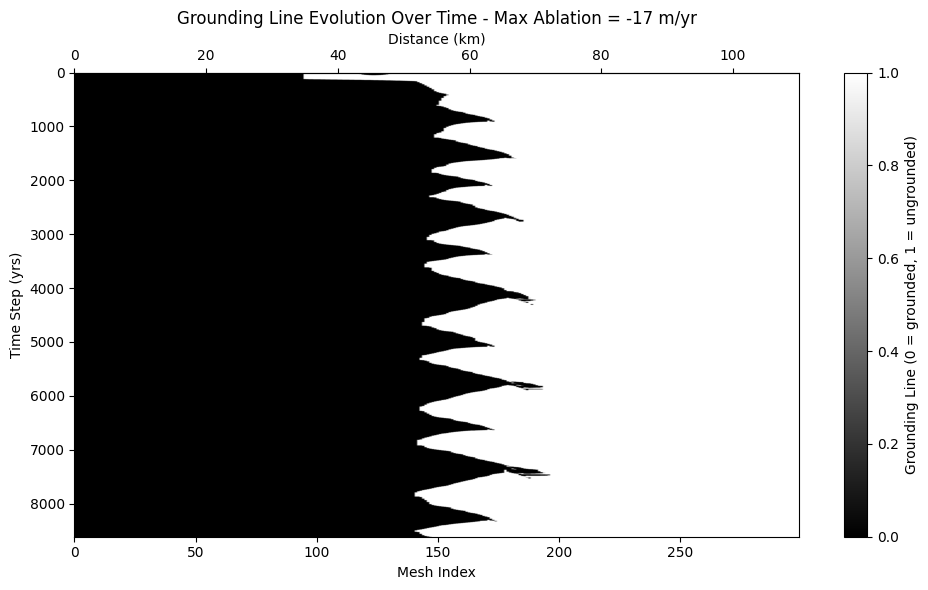

In [9]:
GL_dict = DATA_dict_amin17['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin17)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [10]:
last_key = list(GL_dict.keys())[-1]
print(last_key)


8616.721963273447


Grounding Line Plot - Amin = -18


In [5]:
gl_run_title_amin18 = str("Grounding Line Evolution Over Time - Max Ablation = -18 m/yr")
amin18 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/Amin_Amax_Tests/AMAX_8/Run9_min18/DATA_Dictionary_2025_04_16__00_04_25.pkl.gz"
with gzip.open(amin18, 'rb') as f:
    DATA_dict_amin18 = pickle.load(f)

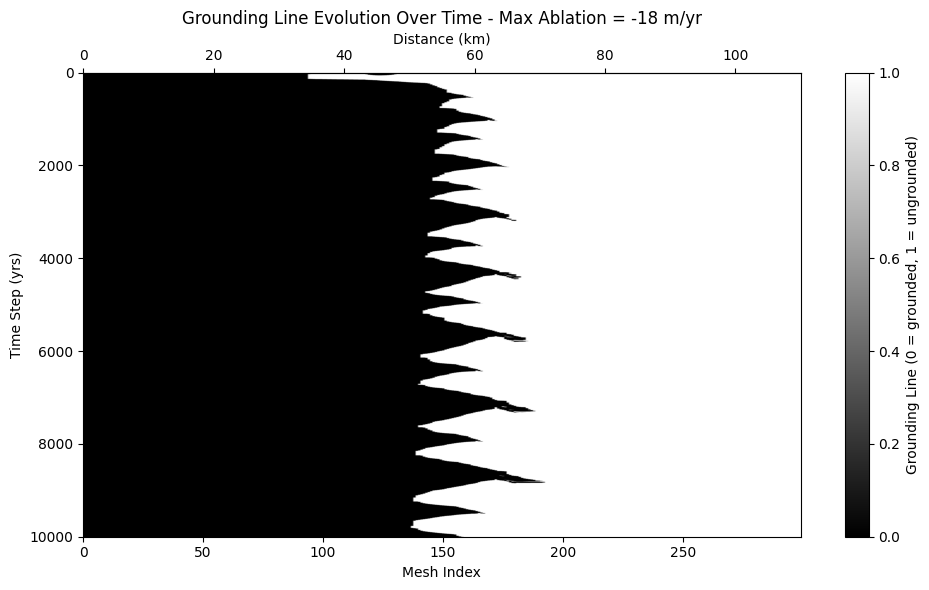

In [6]:
GL_dict = DATA_dict_amin18['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amin18)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [7]:
last_key = list(GL_dict.keys())[-1]
print(last_key)


10001.97723115188


In [ ]:
gl_positions = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions.append(idx)

gl_positions = np.array(gl_positions)
GL_km = mesh_index_to_km(gl_positions)